<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/pandasIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 입출력

## 외부에서 읽어오기

In [3]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
from google.colab import files
files.upload()

In [5]:
# csv 파일
# 파일 경로를 확인하고 변수에 저장
file_path = './read_csv_sample.csv'

In [6]:
# read_csv() 함수로 원데이터의 형태에 맞는 판다스 자료구조 객체로 읽어들이면 된다
df1 = pd.read_csv(file_path)
df1

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df2 = pd.read_csv(file_path, header=None)
df2

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


In [9]:
df3 = pd.read_csv(file_path, index_col='c0')
df3

,c1,c2,c3
c0,,,
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
'''
[참고]
csv 파일에 따라 쉽표(,) 대신 공백(" "), tap 으로 텍스트를 구분하기도 함,
이 때 구분자로 delim=, sep=
'''

In [11]:
# excel 파일 읽어들이기
# read_excel()
df1 = pd.read_excel('./남북한발전전력량.xlsx')
df1

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [12]:
# JSON 파일 읽어들기
# read_json
df = pd.read_json('read_json_sample.json')
df

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


In [13]:
# web에서 읽어들이기
url = 'sample.html'

In [14]:
# HTML 웹페이지 표(table) 를 읽어들이기 가능
tables = pd.read_html(url)
tables

[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

In [15]:
for i in range(len(tables)):
  print('tables[%s]' % i)
  print(tables[i])
  print('\n')

tables[0]
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


tables[1]
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True




In [16]:
# 각 테이블을 데이터프레임 객체로 만들기
df1 = DataFrame(tables[0])
df2 = DataFrame(tables[1])

In [17]:
df1

,Unnamed: 0,c0,c1,c2,c3
0,0,0,1,4,7
1,1,1,2,5,8
2,2,2,3,6,9


In [18]:
df2

,name,year,developer,opensource
0,NumPy,2006,Travis Oliphant,True
1,matplotlib,2003,John D. Hunter,True
2,pandas,2008,Wes Mckinneye,True


## 데이터 저장하기

In [19]:
# csv 저장하기
data = {
    'name' : ['Jerry', 'Riah', 'Paul'],
    'algo' : ['A', 'A', 'B'],
    'basic' : ['B', 'B+', 'B'],
    'python' : ['B+', 'C', 'C+']
}

In [20]:
df = DataFrame(data)
df

,name,algo,basic,python
0,Jerry,A,B,B+
1,Riah,A,B+,C
2,Paul,B,B,C+


In [21]:
df.set_index('name', inplace=True)
df

,algo,basic,python
name,,,
Jerry,A,B,B+
Riah,A,B+,C
Paul,B,B,C+


In [22]:
df.to_csv('df_sample.csv')

In [23]:
files.download('df_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# data를 json으로 저장, excel로 저장

In [25]:
df.to_json('df_sample.json')

In [26]:
df.to_excel('df_sample.xlsx')

In [27]:
# 여러개의 데이터 프레임을 엑셀파일 하나에 각각저장
data1 = {
    'name' : ['Jerry', 'Riah', 'Paul'],
    'algo' : ['A', 'A', 'B'],
    'basic' : ['B', 'B+', 'B'],
    'python' : ['B+', 'C', 'C+']
}

data2 = {
    'c0' : [1, 2, 3],
    'c1' : [4, 5, 6],
    'c2' : [7, 8, 9],
    'c3' : [10, 11, 12],
    'c4' : [13, 14, 15]
}

In [28]:
df1 = DataFrame(data1)
df1.set_index('name', inplace=True)

df2 = DataFrame(data2)
df2.set_index('c0', inplace=True)

In [29]:
# df1은 sheet1로, df2는 sheet2로 저장
# ExcelWriter 와 함께 사용
writer = pd.ExcelWriter('./df_excelWriter.xlsx')
df1.to_excel(writer, sheet_name='sheet1')
df2.to_excel(writer, sheet_name='sheet2')
writer.save()

In [30]:
files.download('./df_excelWriter.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 데이터 살펴보기

In [38]:
df = pd.read_csv('./auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
'''
1. mpg                    연비                : continuous
2. cylinders              실린더수            : multi-valued discrete
3. displacement           배기량              : continuous
4. horsepower             마력                : continuous
5. weight                 차량무게            : continuous
6. acceleration           가속능력            : continuous
7. model year             출시년도            : multi-valued discrete
8. origin                 제조국              : multi-valued discrete
9. car name               자동차이름          : string (unique for each instance)
'''

In [33]:
# 데이터프레임의 데이터 일부만 확인       (다 확인하는것은 권유하지 않음)
df.head()     #위에서부터   (숫자만큼에 행수) default: 5개

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [34]:
df.tail()     #아래에서부터

,0,1,2,3,4,5,6,7,8
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [41]:
# 열 이름을 지정 데이터세트 구성
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 데이터 정보 확인


In [43]:
#데이터 크기 확인 (행, 열)
df.shape

(398, 9)

In [42]:
# 기본정보
df.info()     # Dtype == object : 숫자가 아니다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [44]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [45]:
df.mpg.dtypes

dtype('float64')

* 기술통계

In [46]:
# 데이터 개수 확인
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [47]:
# 특정 열이 가지고 있는 고유값 확인
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [48]:
# 평균
df.mean()     # 처음부터 숫자데이터가 아닌 열(object)은 제외하도록 설계

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [49]:
# 특정 열 평균값
df.mpg.mean()

23.514572864321607

In [51]:
# 특정 열 평균값 - 열 두 개 선택
df[['mpg', 'weight']].mean()

mpg         23.514573
weight    2970.424623
dtype: float64

In [54]:
# 상관계수
df.corr()       #절대치로 본다

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [55]:
df[['mpg', 'weight']].corr()        # 우하향  음의관계로 상관이 굉장히 있다.

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


In [62]:
# 중간값, 최대값, 최소값, 표준편차
# median(), max(), min(), std()
df.median()
df.max()
df.min()
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [63]:
df.describe()       #산술데이터만 보여줌

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [64]:
df.describe(include='all')    # 산술데이터가 아닌 것도 다 보여줌

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


# 그래프 도구를 이용한 탐색

In [68]:
df = pd.read_excel('남북한발전전력량.xlsx')

df.head(10)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [73]:
# 남한, 북한 합계 정보
df_sn = df.iloc[[0, 5], 2:]
df_sn

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
5,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


In [74]:
df_sn.index = ['South', 'North']
df_sn.columns = df_sn.columns.map(int)    # 열 자료형을 정수형으로 변경
df_sn.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


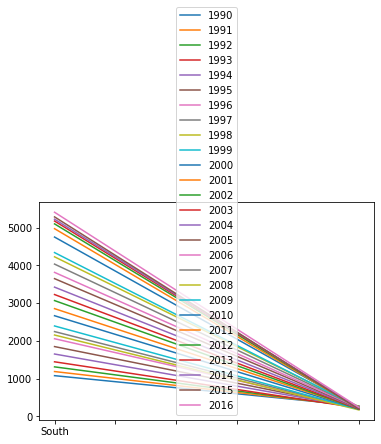

In [75]:
df_sn.plot()

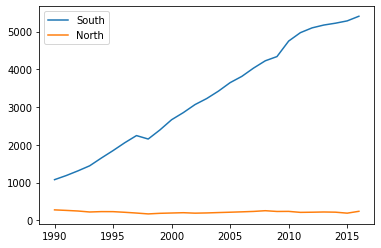

In [80]:
# 행, 열 전치
tdf_sn = df_sn.T
tdf_sn.plot()       # default : 선그래프

In [81]:
tdf_sn.head()

,South,North
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


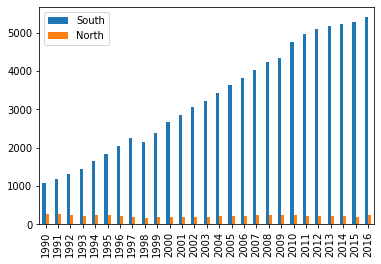

In [79]:
# 막대 그래프
tdf_sn.plot(kind='bar')

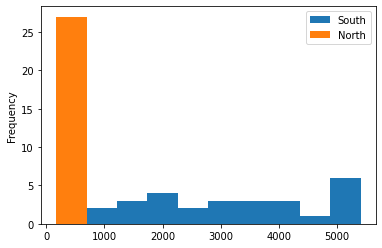

In [82]:
# 히스토그램
tdf_sn.plot(kind='hist')

In [83]:
# 산점도
df = pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


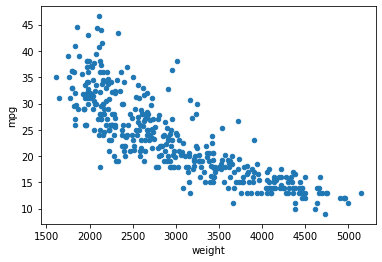

In [86]:
# 차량의 무게가 늘수록 연비는 전반적으로 낮아지는 경향이 보인다.
# 역상관관계
df.plot(x='weight', y='mpg', kind='scatter')

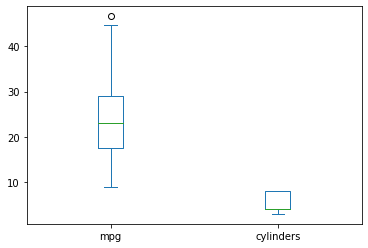

In [89]:
# 박스플록
df[['mpg', 'cylinders']].plot(kind='box')